<a href="https://colab.research.google.com/github/ilafmakke/EDAcapston/blob/main/analyse_data_visualisepynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Load the Airbnb listings data
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]
# Prompt user for file path
filename = uploaded_filenames[0]
df = pd.read_csv(filename)
# Display basic information about the dataset
print(df.info())

Saving listings.csv to listings.csv
['listings.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   float64
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   float64
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id   

In [2]:
# Data Cleaning: Replace missing values with median
df.fillna(df.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   float64
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   float64
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

<ipython-input-2-608e6c36b040>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


<Figure size 1000x600 with 0 Axes>

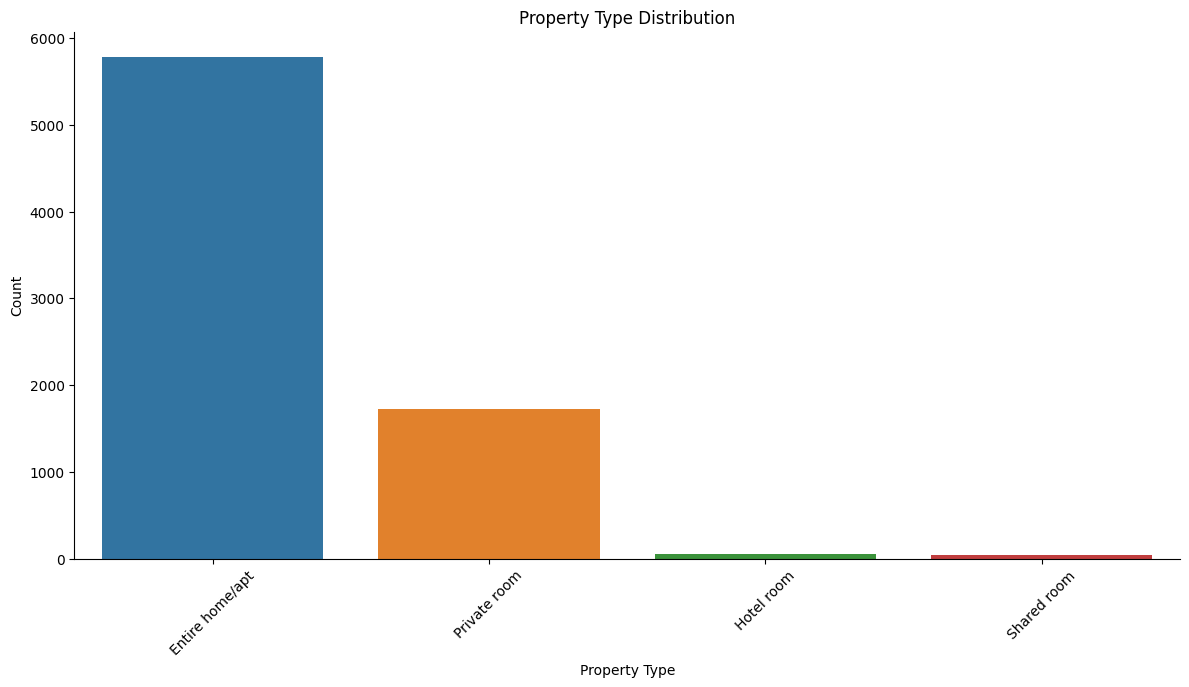

The property type distribution of entire homes is the most numerous, followed by Private room, while hotel rooms  and shared room are almost non-existent in number.


In [4]:
df_cleaned=df
summary_stats = df_cleaned.describe()
#host_location
#availability_30
#room_type

#print(summary_stats)

# Visualizations
# Distribution of prices

# Categorical plots using catplot
# Property type distribution
plt.figure(figsize=(10, 6))
sns.catplot(x='room_type', data=df_cleaned, kind='count', height=6, aspect=2)
plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("The property type distribution of entire homes is the most numerous, followed by Private room, while hotel rooms  and shared room are almost non-existent in number.")

<Figure size 1000x600 with 0 Axes>

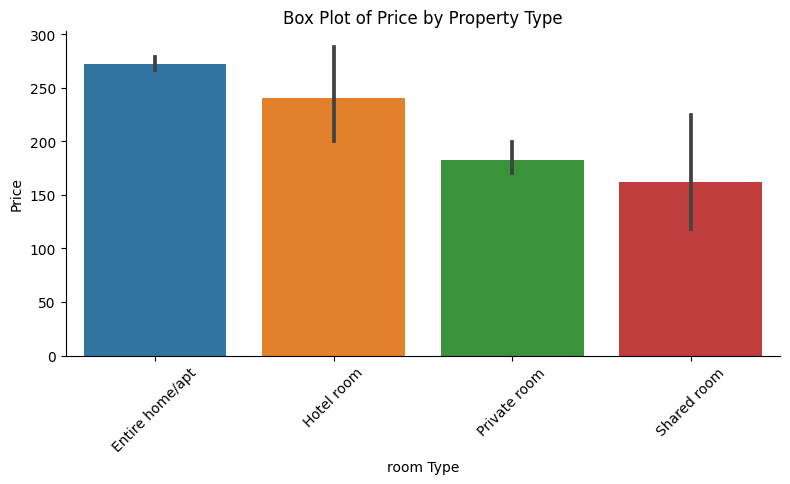

********************************************************************
 the entire rooms were the most expensive property type


<Figure size 500x500 with 0 Axes>

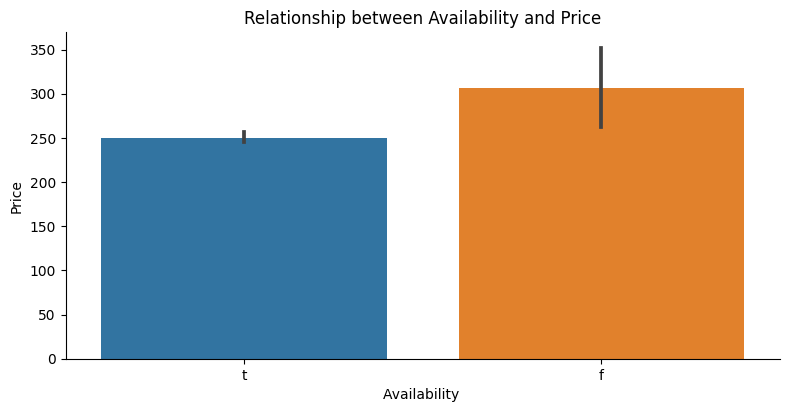

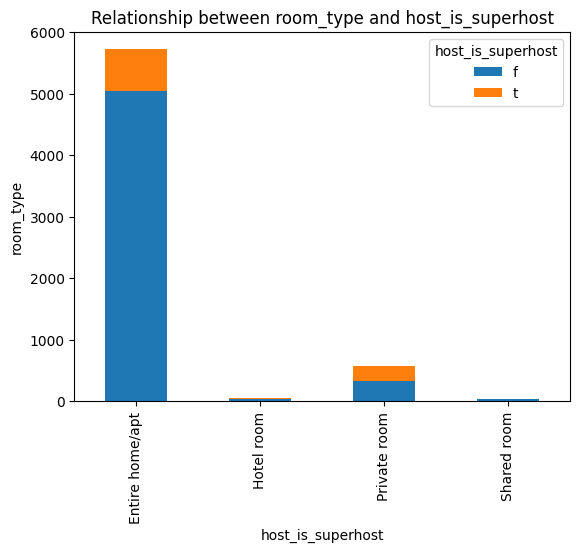

********************************************************************
1-Although the entire rooms were the most expensive, the dissatisfaction rate was the highest one
2-Everyone was satisfied with the shared rooms even though they were the cheapest


In [27]:
#Convert 'Property Type' to category type
df_cleaned['room_type'] = df_cleaned['room_type'].astype('category')
#df_cleaned['price'] = df_cleaned['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Data Visualization: Box plot for property types and prices
plt.figure(figsize=(10, 6))
sns.catplot(x='room_type', y='price', data=df_cleaned, kind='bar', height=4, aspect=2)
plt.title("Box Plot of Price by Property Type")
plt.xlabel("room Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

print("********************************************************************")
print(" the entire rooms were the most expensive property type")

# Relationship between availability and price
plt.figure(figsize=(5, 5))
sns.catplot(x='has_availability', y='price', data=df_cleaned, kind='bar', height=4, aspect=2)
plt.title('Relationship between Availability and Price')
plt.xlabel('Availability ')
plt.ylabel('Price')
plt.show()
#sns.catplot(x='host_is_superhost', y='room_type', data=df_cleaned, kind='bar', height=4, aspect=2)


# Relationship between host_is_superhost and room_type
data = df.groupby(['room_type', 'host_is_superhost']).size().unstack(fill_value=0)
# Create the clustered bar chart
fig, ax = plt.subplots()
data.plot(kind="bar", stacked=True, ax=ax)
plt.title('Relationship between room_type and host_is_superhost')
plt.xlabel('host_is_superhost')
plt.ylabel('room_type')
plt.show()

print("********************************************************************")
print("1-Although the entire rooms were the most expensive, the dissatisfaction rate was the highest one")
print("2-Everyone was disatisfied with the shared rooms even though they were the cheapest")

<Figure size 1200x600 with 0 Axes>

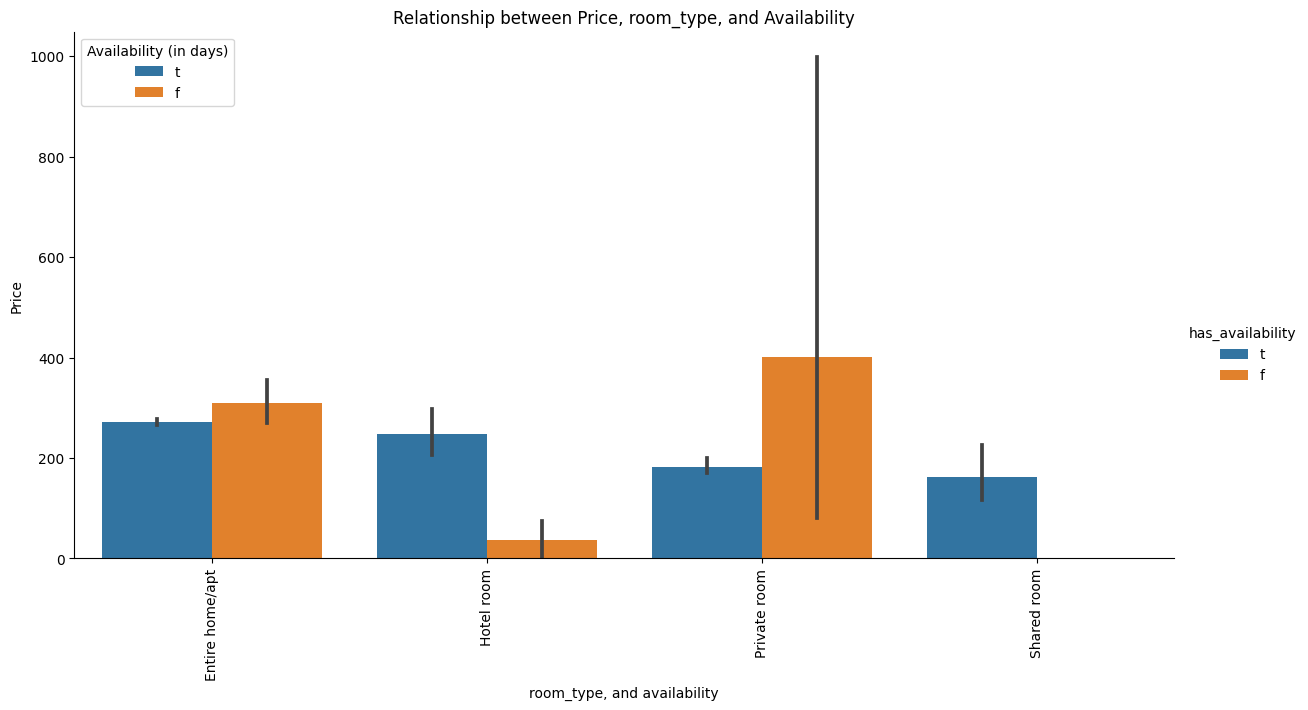

<Figure size 1200x600 with 0 Axes>

In [22]:
# Relationship between price, room_type, and availability
plt.figure(figsize=(12, 6))
sns.catplot(x='room_type', y='price', hue='has_availability', data=df_cleaned, kind='bar', height=6, aspect=2)
plt.title('Relationship between Price, room_type, and Availability')
plt.xlabel('room_type, and availability')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(title='Availability (in days)')
plt.show()

# Relationship between price, room_type, and availability
plt.figure(figsize=(12, 6))
data = df.groupby(['has_availability', 'host_is_superhost','room_type']).size().unstack(fill_value=0)

In [ ]:
print("Analysis Summary:")
print("1- The distribution of prices shows that  The demand for the private room is high despite its price being higher than the other rooms")
print("2- The sharing room has low demand, and its price is the cheapest.")
print("3- Half of the quantity of the entire apartment is booked.")
print("suggestion")
print("They should reduce the number of shared room and hotel room because there is no demand for them.")
print("They should increase the number of private room because there is high demand for them.")

Analysis Summary:
1- The distribution of prices shows that  The demand for the private room is high despite its price being higher than the other rooms
2- The sharing room has low demand, and its price is the cheapest.
3- Half of the quantity of the entire apartment is booked.
